In [3]:
import numpy as np
import pandas as pd
import re
import json

movies = pd.read_csv("tmdb_5000_credits.csv")
acters = movies[['cast']]
actersls = acters['cast'].tolist()

In [4]:
collections = []
oneCollection = []
for i in actersls:
    ac_json = json.loads(i)
    for j in ac_json:
        oneCollection.append(j['name'])
    collections.append(oneCollection)
    oneCollection = []

data = [['yo', 'hei']]
j = 1
relationDf = pd.DataFrame(data, columns=['title', 'acter'])
for index,i in enumerate(collections):
    df = pd.DataFrame({'acter': i})
    df['title'] = movies['title'][index]
    relationDf = relationDf.append(df)
relationDf

D:\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,acter,title
0,hei,yo
0,Sam Worthington,Avatar
1,Zoe Saldana,Avatar
2,Sigourney Weaver,Avatar
3,Stephen Lang,Avatar
4,Michelle Rodriguez,Avatar
5,Giovanni Ribisi,Avatar
6,Joel David Moore,Avatar
7,CCH Pounder,Avatar
8,Wes Studi,Avatar


In [5]:
relationDf.index = pd.RangeIndex(len(relationDf.index))
relationDf.drop(relationDf.index[0], inplace=True)
relationDf.head(10)

,acter,title
1,Sam Worthington,Avatar
2,Zoe Saldana,Avatar
3,Sigourney Weaver,Avatar
4,Stephen Lang,Avatar
5,Michelle Rodriguez,Avatar
6,Giovanni Ribisi,Avatar
7,Joel David Moore,Avatar
8,CCH Pounder,Avatar
9,Wes Studi,Avatar
10,Laz Alonso,Avatar


In [24]:
relationDf.to_csv("relationDf.csv")

In [92]:
df = pd.read_csv("relationDf.csv")

# Exemple
df.drop(['Unnamed: 0'], axis=1, inplace=True)
#df1 = df.loc[df['title']=='Avatar']
# 54201 acters
print("There are : " + str(len(df.acter.unique())) + " acters.")
# 4757 films
print("There are : " + str(len(df.title.unique())) + " films.")

# Calculate acters frequence in all films
freq = df.groupby('acter').count().sort_values(by=['title'], ascending=[False])
freq

There are : 54201 acters.
There are : 4757 films.


,title
acter,
Samuel L. Jackson,67
Robert De Niro,57
Bruce Willis,51
Matt Damon,48
Morgan Freeman,46
Steve Buscemi,43
Liam Neeson,41
Johnny Depp,40
Owen Wilson,40


In [93]:
# Select the acters who plays at least 10 films
freq = freq.loc[freq['title'] >= 20].sort_values(by=['title'], ascending=[False])
# Restructure freq in a correct format
freq['acter'] = freq.index
#freq.index = pd.RangeIndex(len(freq.index))
freq

,title,acter
acter,,
Samuel L. Jackson,67,Samuel L. Jackson
Robert De Niro,57,Robert De Niro
Bruce Willis,51,Bruce Willis
Matt Damon,48,Matt Damon
Morgan Freeman,46,Morgan Freeman
Steve Buscemi,43,Steve Buscemi
Liam Neeson,41,Liam Neeson
Johnny Depp,40,Johnny Depp
Owen Wilson,40,Owen Wilson


In [107]:
# Select the acters who plays at least 10 films and converts thems into a list
famousActers = freq['acter'].tolist()

# Construct a simple graph by Kevin Kline

filmsKK = df[df['acter'] == 'Kevin Kline']['title'].tolist()
testG = df[(df['title']).isin(filmsKK)]
testG

,Unnamed: 0,acter,title
3589,3590,Will Smith,Wild Wild West
3590,3591,Kevin Kline,Wild Wild West
3591,3592,Kenneth Branagh,Wild Wild West
3592,3593,Salma Hayek,Wild Wild West
3593,3594,M. Emmet Walsh,Wild Wild West
3594,3595,Ted Levine,Wild Wild West
3595,3596,Frederique van der Wal,Wild Wild West
3596,3597,Musetta Vander,Wild Wild West
3597,3598,Sofia Eng,Wild Wild West
3598,3599,Garcelle Beauvais,Wild Wild West


<IPython.core.display.Javascript object>


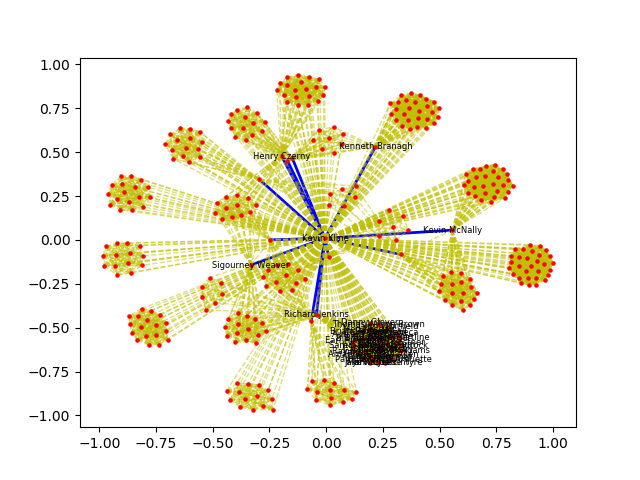

In [113]:
# Construction of network
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib notebook
G = nx.Graph()

def extractionActers(G,df):
#     acters = df[df['title']=='Avatar']['acter']
#     addEdgeForOneFilm(G,acters.tolist())
    for i in df.title.unique():
        acters = df.loc[df['title'] == i]
        addEdgeForOneFilm(G,acters['acter'].tolist())

def addEdgeForOneFilm(G, acters):
    for i,a in enumerate(acters):
        for j in range(i+1, len(acters)):
            #print("add edge for " + a + " at pos " + str(i) + " and " + acters[j] + " at pos " + str(j))
            if G.has_edge(a, acters[j]):
                G[a][acters[j]]['weight'] += 0.5
            else:
                G.add_edge(a, acters[j], weight=0.1)

            
# If u want to draw all the data, replace here testG => df
# But I tried to use all data, but it doesn't work at all.
extractionActers(G, testG)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=5)

In [111]:

# labels of points
# A label matches an acters, there I add labels for a node when this acter make more 30 cooperations.
# labels = {}
# for node in G.nodes():
#     if len(G.edges(node)) > 30:
#         labels[node] = node

# nx.draw(G, with_labels=False)

In [114]:
# edges
# elarge: blue and width:2, mean the acters make more than 2 times cooperations
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2,  edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5,  edge_color='y', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, labels, font_size=6, font_family='sans-serif')

#plt.subplots(figsize=(20,20))
#plt.axis('off')

{'Kevin Kline': Text(-0.00536504,0.00961854,'Kevin Kline'),
 'Kenneth Branagh': Text(0.216944,0.530326,'Kenneth Branagh'),
 'Henry Czerny': Text(-0.196921,0.477412,'Henry Czerny'),
 'Sigourney Weaver': Text(-0.331689,-0.143144,'Sigourney Weaver'),
 'Richard Jenkins': Text(-0.0425852,-0.42765,'Richard Jenkins'),
 'Kevin McNally': Text(0.556327,0.0555952,'Kevin McNally'),
 'Scott Glenn': Text(0.20243,-0.619962,'Scott Glenn'),
 'Kevin Costner': Text(0.306648,-0.586213,'Kevin Costner'),
 'Danny Glover': Text(0.192284,-0.470949,'Danny Glover'),
 'Brian Dennehy': Text(0.156421,-0.519163,'Brian Dennehy'),
 'John Cleese': Text(0.226062,-0.700167,'John Cleese'),
 'Brad Leland': Text(0.194083,-0.563151,'Brad Leland'),
 'Marvin J. McIntyre': Text(0.259084,-0.699828,'Marvin J. McIntyre'),
 'Sheb Wooley': Text(0.241289,-0.624581,'Sheb Wooley'),
 'Jon Kasdan': Text(0.172276,-0.638491,'Jon Kasdan'),
 'Todd Allen': Text(0.310587,-0.654338,'Todd Allen'),
 'Kenny Call': Text(0.258702,-0.520606,'Kenny Ca

In [115]:
# Here more data will be used 
df = pd.read_csv("relationDf.csv")
# Select the acters who plays at least 10 films
freq = df.groupby('acter').count().sort_values(by=['title'], ascending=[False])
freq = freq.loc[freq['title'] >= 15].sort_values(by=['title'], ascending=[False])
# Restructure freq in a correct format
freq['acter'] = freq.index
famousActers = freq['acter'].tolist()
# testG selects the acters who plays more than 20 films and includes the films they have played
testG = df[(df['acter']).isin(famousActers)]
testG.sort_values(by=['acter'])
testG.drop(['Unnamed: 0'], axis=1, inplace=True)
testG

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,acter,title
1,Zoe Saldana,Avatar
2,Sigourney Weaver,Avatar
5,Giovanni Ribisi,Avatar
83,Johnny Depp,Pirates of the Caribbean: At World's End
85,Keira Knightley,Pirates of the Caribbean: At World's End
86,Stellan Skarsgård,Pirates of the Caribbean: At World's End
88,Bill Nighy,Pirates of the Caribbean: At World's End
89,Geoffrey Rush,Pirates of the Caribbean: At World's End
91,Kevin McNally,Pirates of the Caribbean: At World's End
94,Jonathan Pryce,Pirates of the Caribbean: At World's End


<IPython.core.display.Javascript object>


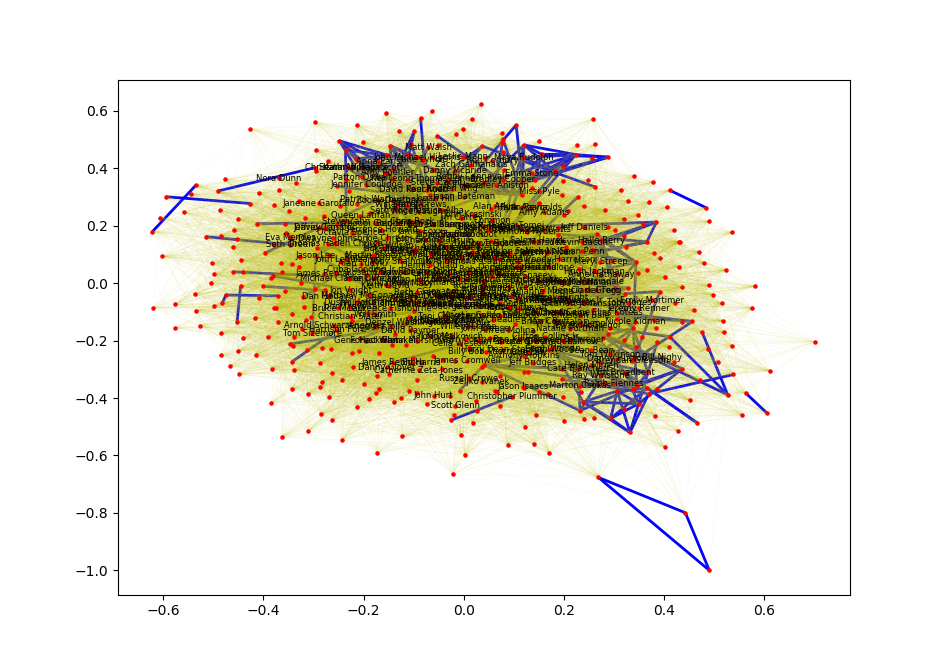

<IPython.core.display.Javascript object>


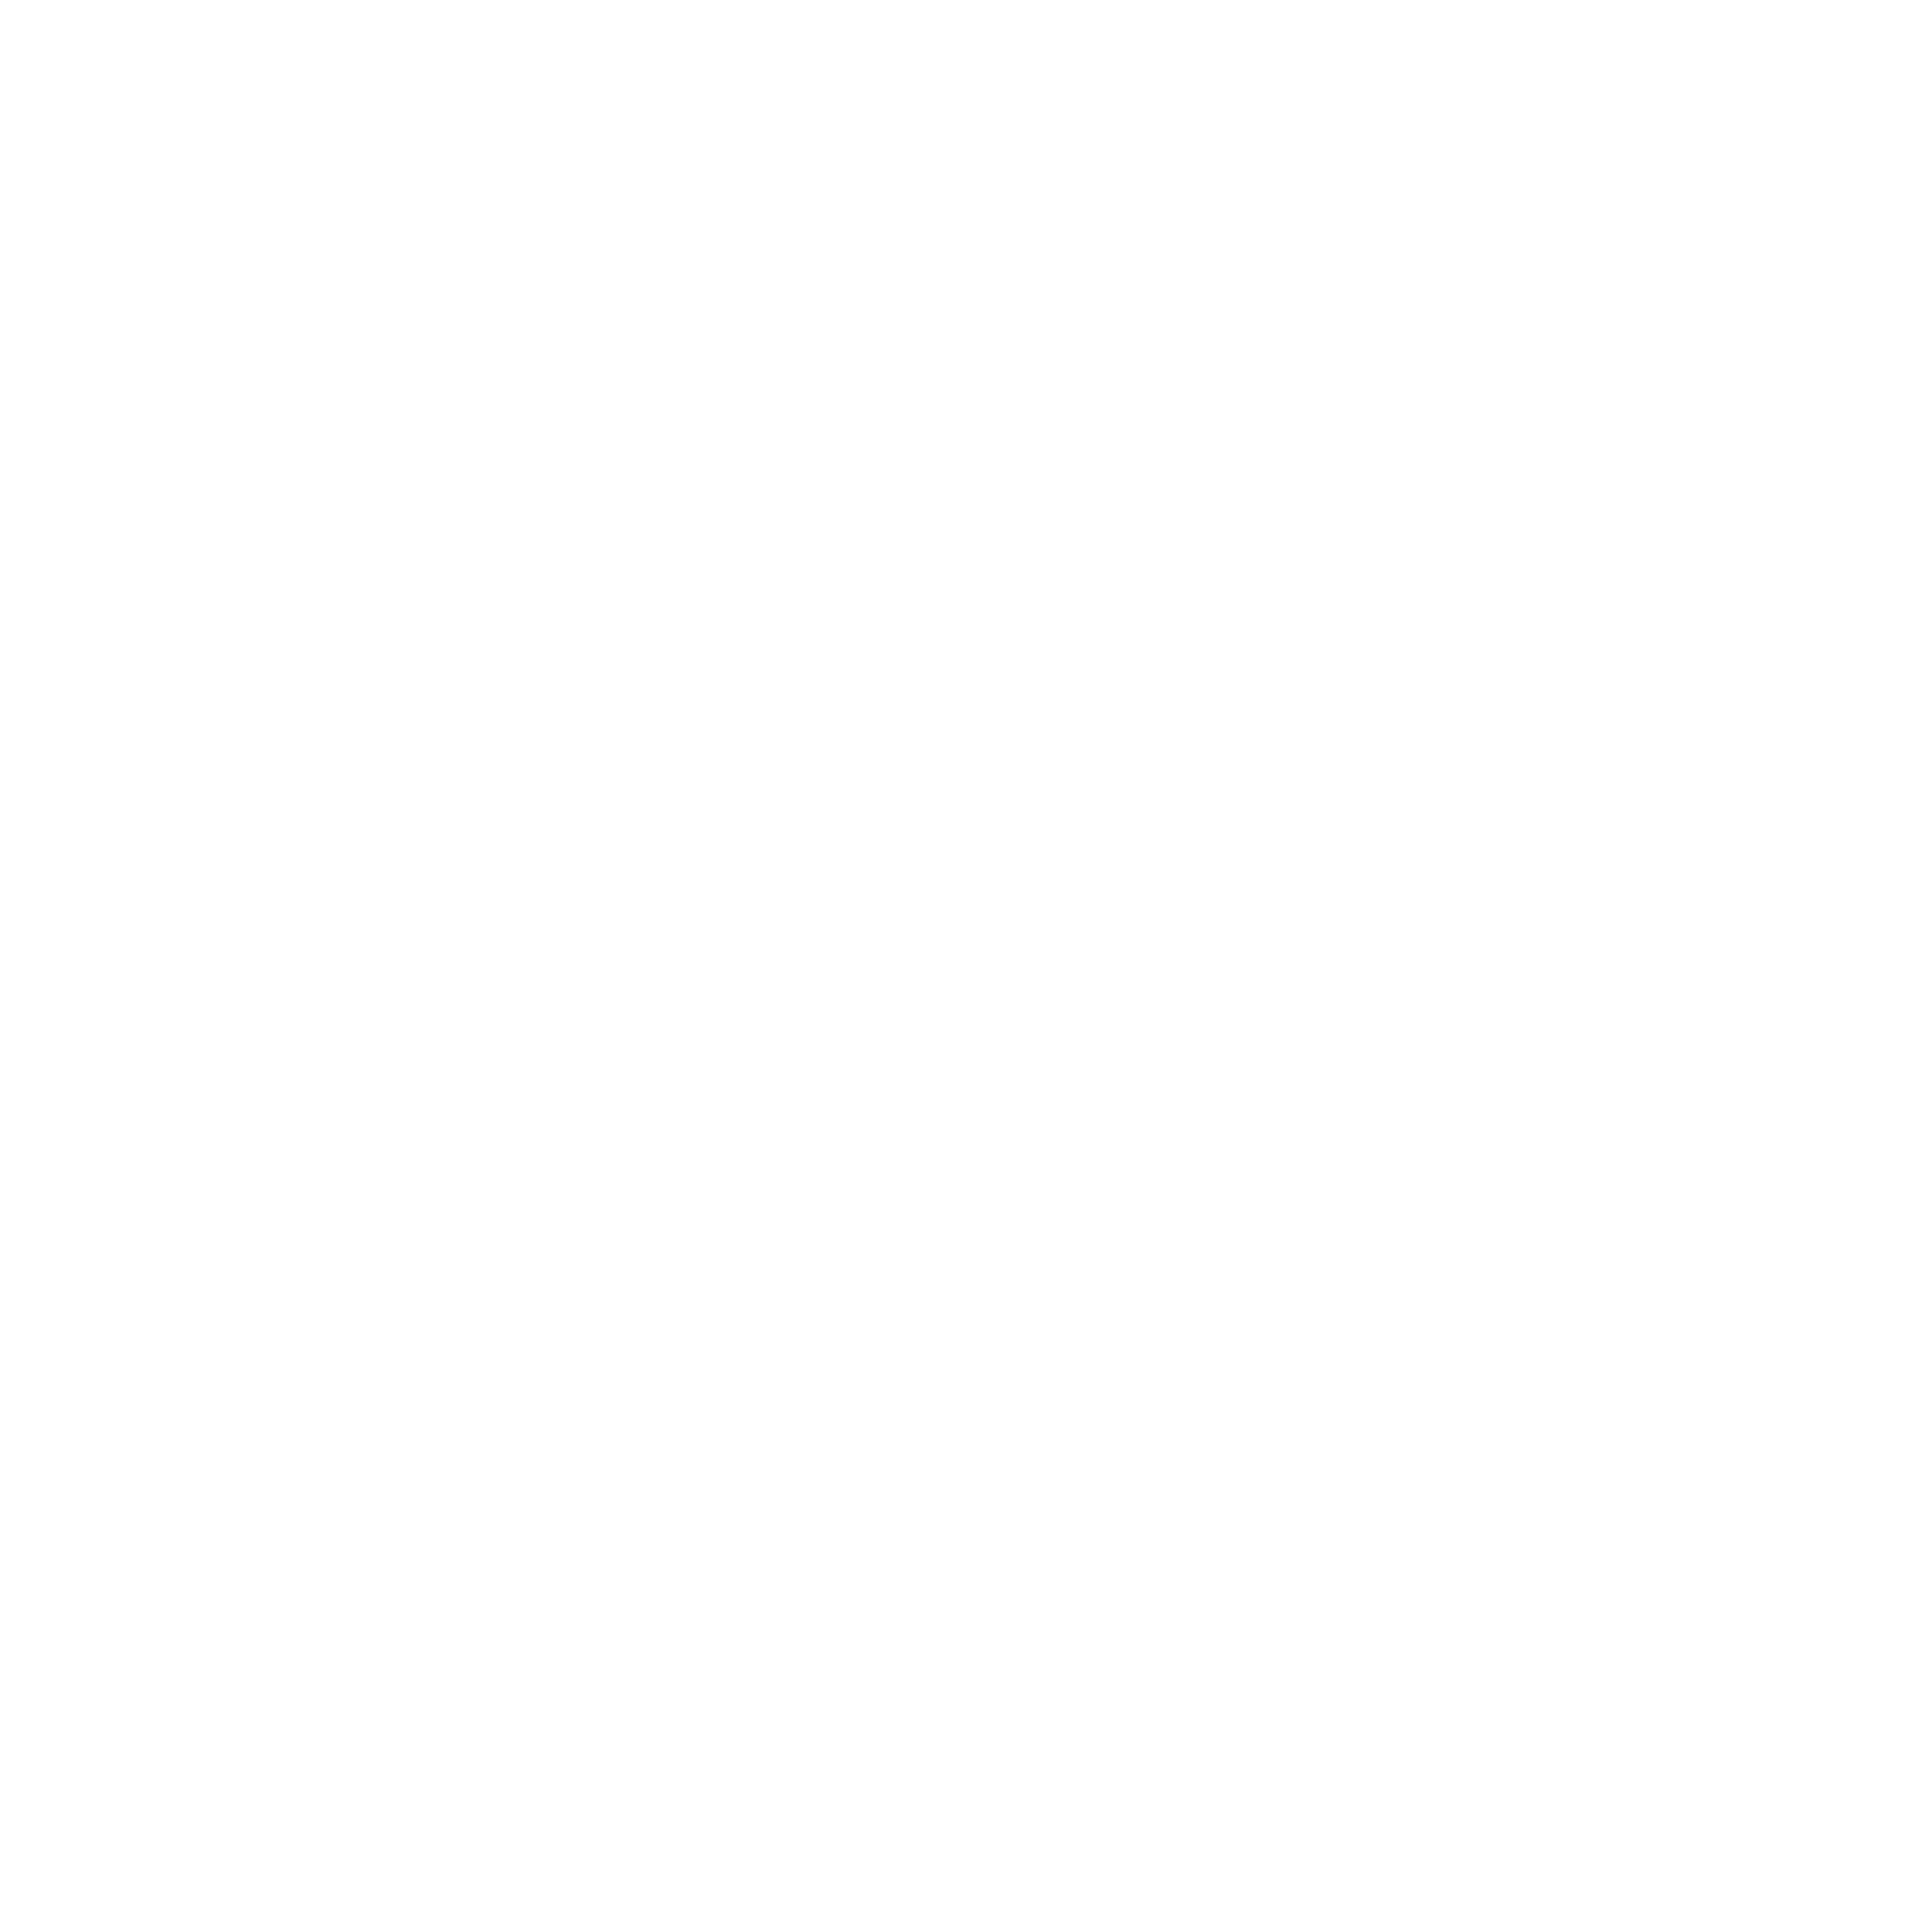

In [119]:
Gx = nx.Graph()
plt.figure(1)
extractionActers(Gx, testG)

pos = nx.spring_layout(Gx)
nx.draw_networkx_nodes(Gx, pos, node_size=5)

# labels of points
# A label matches an acters, there I add labels for a node when this acter make more than 80 cooperations with other acters.
labels = {}
for node in Gx.nodes():
    if len(Gx.edges(node)) > 80:
        labels[node] = node
nx.draw(Gx, with_labels=False)

# Blue line means that the two node linked have makes 3 times cooperations in films 
elarge = [(u, v) for (u, v, d) in Gx.edges(data=True) if d['weight'] > 1.5]
esmall = [(u, v) for (u, v, d) in Gx.edges(data=True) if d['weight'] <= 0.5]
nx.draw_networkx_edges(Gx, pos, edgelist=elarge, width=2,  edge_color='b')
nx.draw_networkx_edges(Gx, pos, edgelist=esmall, width=0.1, alpha=0.5,  edge_color='y', style='dashed')

# labels
nx.draw_networkx_labels(Gx, pos, labels, font_size=6, font_family='sans-serif')
plt.subplots(figsize=(20,20))
plt.axis('off')
plt.show()